## 1. Le docteur Ignaz Semmelweis

In [8]:
# Nous allons commencer par importer les data sets
import pandas as pd

yearly = pd.read_csv('Documents/Handwashing/yearly_deaths_by_clinic.csv')
monthly = pd.read_csv('Documents/Handwashing/monthly_deaths.csv')

yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


Le tableau ci-dessus montre le nombre de femmes ayant accouché dans les deux cliniques de l'hôpital général de Vienne pour les années 1841 à 1846. Nous pouvons constater un nombre alarmant de décès.

Nous le voyons plus clairement si nous regardons la proportion de décès par rapport au nombre de femmes qui accouchent. Zoomons sur la proportion de décès de la clinique 1.

In [10]:
# Calculer la proportion de décès par nombre de naissances
yearly['proportion_deaths'] = yearly['deaths']/yearly['births']

# Nous allons extraire les données pour la clinique 1 et 2
clinic1 = yearly[yearly['clinic'] == 'clinic 1']
clinic2 = yearly[yearly['clinic'] == 'clinic 2']

clinic1[['year', 'proportion_deaths']].head()

,year,proportion_deaths
0,1841,0.078063
1,1842,0.157591
2,1843,0.089542
3,1844,0.082357
4,1845,0.069015


Text(0, 0.5, 'proportion de décès par an')

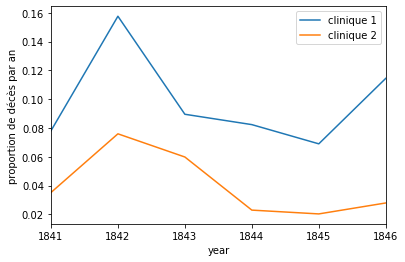

In [11]:
%matplotlib inline

# Nous allons créer un plot de la proportion de décès par an dans les deux cliniques
ax = clinic1.plot(x = 'year', y = 'proportion_deaths', label = 'clinique 1')
clinic2.plot(x = 'year', y = 'proportion_deaths', label = 'clinique 2', ax = ax)
ax.set_ylabel('proportion de décès par an')

Pourquoi la proportion de décès est-elle constamment si élevée dans la clinique 1 ? La seule différence entre les cliniques est que de nombreux étudiants en médecine ont travaillé à la clinique 1, alors que la plupart des étudiants en sage-femme ont travaillé à la clinique 2. Les sages-femmes s'occupaient uniquement des femmes qui accouchaient, les étudiants en médecine passaient également du temps dans les salles d'autopsie à examiner les cadavres.

Semmelweis a commencé à suspecter que quelque chose sur les cadavres, s'est répandait des mains des étudiants en médecine. Ainsi, dans une tentative désespérée de mettre un terme aux taux de mortalité élevés, il a décrété : « Lavez-vous les mains ! » C'était une demande peu orthodoxe et controversée, personne à Vienne ne connaissait les bactéries à ce moment-là. 

In [12]:
# Nous allons télécharger les données par mois de la clinique 1 afin de détecter l'effet de se laver les mains

# Nous allons commencer par calculer la proportion de décès par mois
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']

monthly

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


Text(0, 0.5, 'proportion de décès')

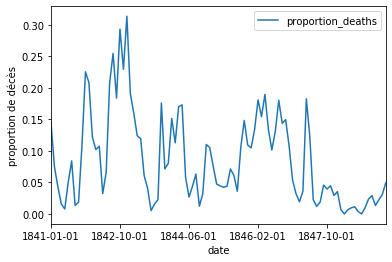

In [13]:
# Nous allons créer un plot pour mieux idéntifier l'effet de se laver les mains
ax = monthly.plot(x = 'date', y = 'proportion_deaths')
ax.set_ylabel('proportion de décès')

À partir de l'été 1847, la proportion de décès est considérablement réduite et, oui, c'est à cette époque que Semmelweis a rendu le lavage des mains obligatoire.

Text(0, 0.5, 'proportion de décès')

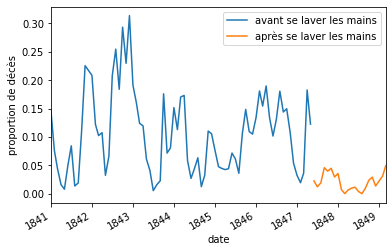

In [22]:
# Date ou les lavage des mains devient obligatoire
monthly['date'] = pd.to_datetime(monthly['date'])
handwashing_start = pd.to_datetime('1847-06-01')

# Nous allons diviser les mois entre l'avant et l'après la date obligatoire concernant le lavage des mains
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Nous allons créer le plot pour voir la différence
ax = before_washing.plot(x = 'date', y = 'proportion_deaths', label = 'avant se laver les mains')
after_washing.plot(x = 'date', y = 'proportion_deaths', label = 'après se laver les mains', ax = ax)
ax.set_ylabel('proportion de décès')

Mais, dans quelle mesure a-t-elle réduit la proportion mensuelle moyenne de décès ?

In [25]:
# Différence dans la proportion mensuelle moyenne de décès dus au lavage des mains
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

La pratique du se laver les mains a permis de réduire le nombre de décès de 10% en moyenne à seulement 2% (ce qui reste un chiffre élevé selon les normes modernes).

Pour avoir une idée de l'incertitude quant à la mesure dans laquelle le lavage des mains réduit la mortalité, nous pourrions examiner un intervalle de confiance (ici calculé à l'aide de la méthode bootstrap).

In [27]:
# Nous allons commencer par l'analyse bootstrap
boot_mean_diff = []
for i in range (3000):
    boot_before = before_proportion.sample(frac = 1, replace = True)
    boot_after = after_proportion.sample(frac = 1, replace = True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Nous allons calculer l'interval de confiance à 95% pour boot_mean_diff
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101544
0.975   -0.067539
dtype: float64

Ainsi, le lavage des mains a réduit la proportion de décès de 6,7 à 10 points de pourcentage, selon un intervalle de confiance de 95%.